# **Name** : Rehman Ahmad 
# **Roll No** : 2024-csr-019
# **Lab** : Week 12 - Polynomial Regression $ Ridge (Houses Price Prediction) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1 – Dataset Setup & First Look

We will use real listing data from Zameen.com. The goal is to predict price based on area, bedrooms, baths and location features.

### 1.1 Place the CSV File
- Download the dataset shared by your instructor.
- Save it in the same folder as your Jupyter Notebook.
- File name must be exactly: zameen.csv

In [2]:
df = pd.read_csv("zameen.csv")

In [3]:
df.shape

(168446, 18)

In [4]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


### Task-1: 
Run the code above and write in 2–3 lines: How many rows and columns does your dataset have?

**Ans :** This dataset contain 168446 rows and 18 columns.

# Step 2 – Cleaning & Feature Selection

We will keep only the most useful columns for price prediction and remove noisy text fields.

### 2.1 Select Useful Columns
We will work with these features:

- price – target variable (PKR)
- Total_Area – property area (e.g., square feet / marla conversion)
- bedrooms, baths – numeric features
- property_type – Flat / House
- city – e.g., Islamabad, Lahore

In [6]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [7]:
cols = ["price" , "Total_Area" , "bedrooms" , "baths" , "property_type" , "city"]
data = df[cols].copy()

data.head()

,price,Total_Area,bedrooms,baths,property_type,city
0,10000000,1089.004,2,2,Flat,Islamabad
1,6900000,15246.056,3,3,Flat,Islamabad
2,16500000,2178.008,5,6,House,Islamabad
3,43500000,10890.000,4,4,House,Islamabad
4,7000000,2178.008,3,3,House,Islamabad


# 2.2 Handle Missing Values

In [8]:
data.isnull().sum()

price            0
Total_Area       0
bedrooms         0
baths            0
property_type    0
city             0
dtype: int64

In [9]:
# Simple strategy – drop rows with missing values in required columns
data = data.dropna(subset=["price" , "Total_Area" , "bedrooms" , "baths"])

print("After drop missing rows : " , data.shape)

After drop missing rows :  (168446, 6)


# Task-2:
Count how many rows were removed due to missing values. Mention it in your lab notebook.

**Ans :**
We have 168446 rows before removing missing rows and after removing missing rows we have 168446 **```168446 - 168446 = 0 ```** .So, ```0``` row remove from our data.

# 2.3 Basic Descriptive Statistics

In [10]:
data[["price" , "bedrooms" , "baths" , "Total_Area"]].describe()

,price,bedrooms,baths,Total_Area
count,1.684460e+05,168446.000000,168446.000000,1.684460e+05
mean,1.776576e+07,3.179422,2.874227,1.394239e+04
std,3.531003e+07,1.971401,2.463400,8.623647e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.750000e+05,2.000000,0.000000,1.905757e+03
50%,8.500000e+06,3.000000,3.000000,4.356016e+03
75%,1.950000e+07,4.000000,4.000000,1.197904e+04
max,2.000000e+09,68.000000,403.000000,3.387988e+08


# Step 3 – Simple Exploratory Plots
**Visualize how area, bedrooms and baths relate to price. This helps you understand the shape of the relationship before fitting polynomial models.**

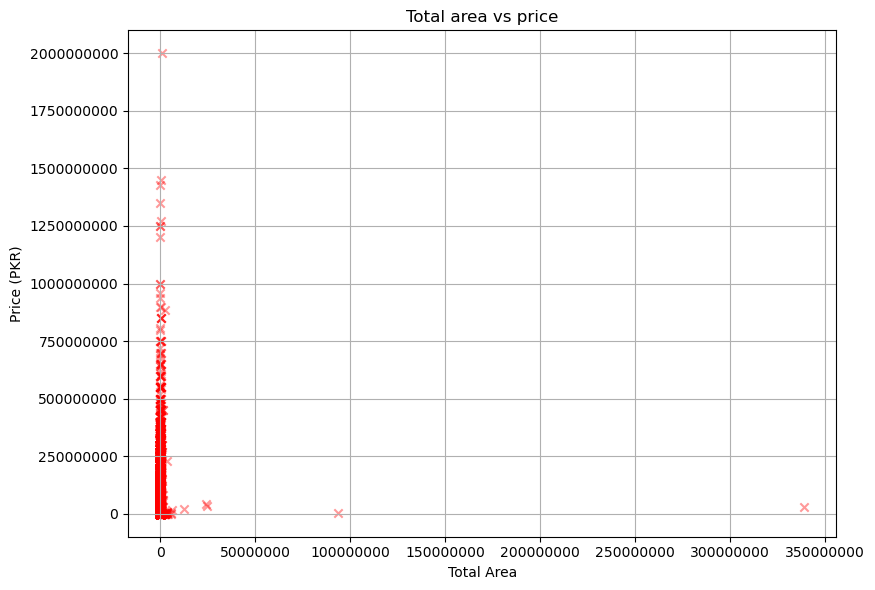

In [11]:
# Scatter plot: Area vs Price

from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(8,6))
plt.scatter(data["Total_Area"] , data["price"] , alpha=0.4 , marker = "x" , c="r")
plt.title("Total area vs price")
plt.xlabel("Total Area")
plt.ylabel("Price (PKR)")
plt.grid(True)
plt.tight_layout()

ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y)}"))

plt.show()

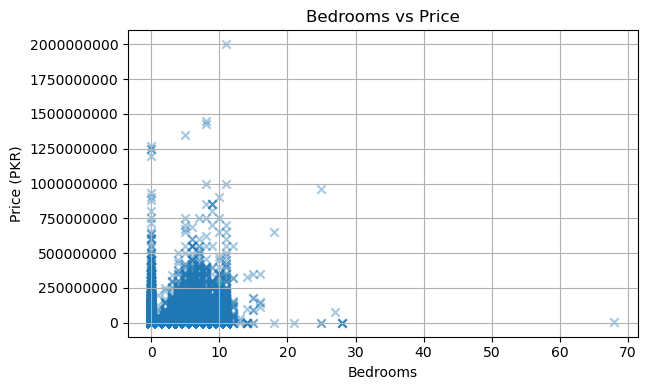

In [12]:
# Scatter plot: Bedrooms vs Price

plt.figure(figsize=(6,4))
plt.scatter(data["bedrooms"], data["price"], alpha=0.4 , marker="x")
plt.xlabel("Bedrooms")
plt.ylabel("Price (PKR)")
plt.title("Bedrooms vs Price")
plt.grid(True)
plt.tight_layout()

ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y)}"))

plt.show()

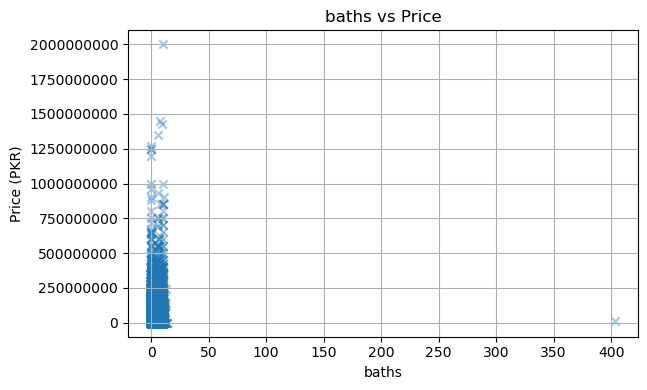

In [13]:
# Scatter plot: baths vs Price


plt.figure(figsize=(6,4))
plt.scatter(data["baths"], data["price"], alpha=0.4 , marker="x")
plt.xlabel("baths")
plt.ylabel("Price (PKR)")
plt.title("baths vs Price")
plt.grid(True)
plt.tight_layout()

ax = plt.gca()

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x)}"))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y)}"))

plt.show()

#  Task-3:
**Write 3 short observations about these plots. Example: Do bigger houses always have higher prices? Is the relation linear?**

**Ans :**

Here are ```3 short, clear observations```:

1. Bigger houses generally have higher prices, but not every large house is expensive, which shows some variation in prices.

2. The relationship between total area and price looks **approximately linear**, meaning price tends to increase as area increases.

3. There is some scatter in the data, indicating that factors other than area (like location or condition) also affect the house price.




# Step 4 – Feature Scaling & Polynomial Regression

We now build a polynomial regression model to predict price using area as the main feature. First we scale the feature, then create polynomial features.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.preprocessing import StandardScaler , PolynomialFeatures 

## 1) `StandardScaler` kya hota hai? (Feature Scaling)

### 🔹 Problem (Scaling kyun zaroori hai?)

Socho tumhare paas 2 features hain:

* **House size** = 50, 100, 200
* **Rooms** = 1, 2, 3

Yahan **house size** bohot bari values rakhta hai aur **rooms** choti.
👉 ML model **bari values ko zyada importance** de deta hai ❌

---

### 🔹 Solution: `StandardScaler`

`StandardScaler` **features ko same scale** par laata hai.

### 👉 Formula:

  xscaled = (x−mean) / standard deviation


Iska matlab:

* Mean → 0
* Std → 1

---

### 🔹 Code:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

---

### ⭐ Kab use hota hai?

✔ Linear Regression
✔ Logistic Regression
✔ SVM
✔ KNN
✔ Gradient Descent based models

❌ Decision Trees / Random Forest (inhein scaling ki zaroorat nahi)

---

### ⭐ Viva Line:

> **StandardScaler features ko normalize karta hai taake model fast aur accurate train ho.**

---

## ⭐ 2) `PolynomialFeatures` kya hota hai?

### 🔹 Problem:

Linear regression sirf **straight line** seekh sakti hai:


y = wx + b


Lekin agar data **curve** ho to? ❌

---

### 🔹 Solution: `PolynomialFeatures`

Ye **new features banata hai**:

* (x)
* (x^2)
* (x^3) …

Taake model **curve fit** kar sake ✅

---

### 🔹 Example:

```python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
```

Agar:

```
X = [2]
```

To ban jaata hai:

```
[1, 2, 4]   → (1, x, x²)
```

---

### ⭐ Mathematical Form:


y = w_1x + w_2x^2 + b


---

### ⭐ Kab use hota hai?

✔ Non-linear data
✔ Curved relationship
✔ Better fitting

❌ Jab data already linear ho

---

### ⭐ Viva Line:

> **PolynomialFeatures linear model ko non-linear banata hai by adding power terms.**

---




## ⭐ Viva Quick Q&A (Star Ready ⭐)

⭐ **Q:** StandardScaler kya karta hai?
👉 Mean 0 aur std 1 par data laata hai.

⭐ **Q:** PolynomialFeatures kyun use hota hai?
👉 Non-linear relation ko capture karne ke liye.

⭐ **Q:** Decision Tree ko scaling chahiye?
👉 ❌ No

---

## ⭐ One-Line Memory Trick ⭐

> **PolynomialFeatures shape banata hai, StandardScaler size control karta hai**

---


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Use only Total_Area as simple example
X = data[["Total_Area"]].values 
y = data["price"].values

print(X)
print(y)

X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size=0.2 , random_state = 42
)

print("Train shape : ", X_train.shape)
print("Test shape : " ,X_test.shape)

[[ 1089.004]
 [15246.056]
 [ 2178.008]
 ...
 [26136.096]
 [21235.578]
 [25591.594]]
[10000000  6900000 16500000 ... 27000000 11000000  9000000]
Train shape :  (134756, 1)
Test shape :  (33690, 1)


## 🔹 Pehla Part: Feature aur Target kya hotay hain?

```python
X = data[["Total_Area"]].values 
y = data["price"].values
```

### 🔸 `X` kya hai?

* `X` **input / feature** hota hai
* Yahan hum **sirf ek cheez use kar rahe hain**: `Total_Area`
* Matlab:
  👉 *House ka size model ko diya ja raha hai*

Example:

```
Total_Area
1200
1500
1800
```

Python mein ML models **2D array** expect karte hain, is liye:

```python
[["Total_Area"]]
```

double brackets use kiye gaye hain.

---

### 🔸 `y` kya hai?

* `y` **output / target** hota hai
* Yahan `price` hai
* Matlab:
  👉 *House ki price jo model predict kare ga*

Example:

```
price
4500000
5200000
6100000
```

📌 **Simple line:**

> `X` = input (jo hum dete hain)
> `y` = output (jo hum predict karna chahte hain)

---

## 🔹 `.values` kyun use kiya?

```python
.values
```

* Pandas column ko **NumPy array** mein convert karta hai
* ML libraries (sklearn) **NumPy arrays** par kaam karti hain

---



## 🔹 Sirf `Total_Area` kyun use kiya?

```python
X = data[["Total_Area"]].values
```

✔️ **Simple Linear Regression** ke liye

* Ek input (x)
* Ek output (y)

Formula:

```
f(x) = wx + b
```

Agar multiple features hoti:

```
Area, Bedrooms, Location
```

to wo **Multiple Linear Regression** hoti.

---

## 🔹 Kahan kahan yeh approach use hoti hai?

✅ House price prediction
✅ Salary prediction
✅ Student marks prediction
✅ ML assignments
✅ Interviews (bohat common question)

---

## 🎯 One-line Viva Answer (Yaad kar lo):

> “We select features as X and target as y, convert them into NumPy arrays, then split data into training and testing sets so the model can learn from training data and be evaluated on unseen test data.”

---



# 4.2 Feature Scaling

In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled)

[[ 0.01179479]
 [ 0.05246494]
 [-0.00543364]
 ...
 [-0.01249448]
 [ 0.05246494]
 [-0.01475394]]
[[-0.00967016]
 [ 0.01094749]
 [-0.01249448]
 ...
 [-0.00402152]
 [-0.00967016]
 [-0.00967016]]


## ⭐ `StandardScaler` kya hota hai?

### aur **hum isay kyun use karte hain?**

### 📌 Problem (Simple words):

Real datasets me values **bohat different scale** par hoti hain.

Example:

* Total_Area = **500, 1000, 5000**
* Price = **5,000,000**

ML models (especially):

* Linear Regression
* Gradient Descent
* KNN
* SVM
  👉 **big values se confuse ho jate hain**

---

## ⭐ StandardScaler ka kaam

**Data ko same scale par lana**

👉 Mean = **0**
👉 Standard Deviation = **1**

### Formula:


X_scaled = (X - mean) / std

---

## ⭐ Simple Example (Exam favorite)

Suppose:

```
Total_Area = [100, 200, 300]
```

### Step 1: Mean


mean = (100+200+300)/3 = 200


### Step 2: Std


std = 81.6 (approx)


### Step 3: Scaling

```
(100 - 200)/81.6 = -1.22
(200 - 200)/81.6 = 0
(300 - 200)/81.6 = +1.22
```

➡️ **Sab values same scale par aa gayi**

---

## ⭐ Tumhara Code — Line by Line 🔥

```python
scaler = StandardScaler()
```

⭐ Ek **scaler object** banaya
Isme mean & std store honge

---

### ✅ Correct Line (VERY IMPORTANT)

```python
X_train_scaled = scaler.fit_transform(X_train)
```

### 🔍 Kya hota hai yahan?

* `fit()` → mean & std **sirf training data** se seekhta hai
* `transform()` → training data ko scale karta hai

➡️ **Rule:**
📌 *Training data se hi seekhna hota hai*

---


```python
X_test_scaled = scaler.transform(X_test)
```

### 🔍 Matlab:

* Test data ko **same scaler** se scale kiya
* Jo training se seekha tha wahi apply hua

---

## ⭐ Summary Table (Exam Ready)

| Line              | Matlab             |
| ----------------- | ------------------ |
| `fit()`           | Mean & std seekhna |
| `transform()`     | Data scale karna   |
| `fit_transform()` | Dono kaam ek sath  |
| Train data        | `fit_transform()`  |
| Test data         | `transform()` only |

---

## ⭐ Kahan use hota hai?

⭐ Linear Regression
⭐ Gradient Descent
⭐ KNN
⭐ SVM
⭐ PCA
⭐ Neural Networks

❌ Decision Trees me zaroori nahi

---

## ⭐ Viva Question (with answer)

⭐ **Q:** StandardScaler kyun use karte hain?
👉 **A:** Taake features same scale par aa jayein aur model fast & accurate seekhe.

⭐ **Q:** Test data par fit kyun nahi karte?
👉 **A:** Kyunki model future data ka idea nahi rakhta (data leakage).

---

## ⭐ Golden One-Line (Exam ke liye 🌟)

> **StandardScaler features ko zero mean aur unit variance par laata hai taake ML models better aur faster learn karen.**

---

# 4.3 Create Polynomial Features (Degree = 2)

In [19]:
poly = PolynomialFeatures(degree = 2 , include_bias = False)

# degree=2 → x² tak
# include_bias=False → extra 1 nahi add karega

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Original feature dimension:", X_train.shape[1])
print("After polynomial transform:", X_train_poly.shape[1])

Original feature dimension: 1
After polynomial transform: 2


 ## 🔹 Viva Questions (Zero → Hero) ⭐⭐⭐

### Q1: Scaling kyu zaroori hai?

👉 Features ko equal importance dene ke liye

### Q2: Test data pe `fit` kyu nahi?

👉 Data leakage ho jata hai

### Q3: Polynomial regression kyu use karte hain?

👉 Jab relation linear na ho

### Q4: Degree zyada ho to kya hoga?

👉 Overfitting

---

## 🔹 One-Line Cheat Sheet ⭐

- **StandardScaler** → data ko same scale pe laata hai
- **PolynomialFeatures** → curve banane ke liye features add karta hai
- **fit = learn**, **transform = apply**

---


## ❗ Important interview line (YAAD KAR LO ⭐)

⭐ **“We apply StandardScaler before PolynomialFeatures to prevent higher-degree terms from dominating the feature space.”** ⭐

---

## 🔁 Summary (ONE LOOK CHEAT ⭐)

| Step | Kya                | Kyun                                |
| ---- | ------------------ | ----------------------------------- |
| 1️⃣  | StandardScaler     | Scale equal banane ke liye          |
| 2️⃣  | PolynomialFeatures | Non-linear relation seekhne ke liye |

---
 


#  4.4 Train Polynomial Regression Model

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly , y_train)

y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)


In [21]:
from sklearn.metrics import r2_score , mean_absolute_error


### **`mean_absolute_error` (MAE) kya hai?**

`mean_absolute_error` ek **regression metric** hai jo yeh measure karta hai ke **aapka model kitna accurately predictions kar raha hai**.

* **Definition:**
  MAE calculate karta hai **predicted values aur actual values ke beech ka average absolute difference**.

Formula:

```
MAE = 1 /n ∑ ∣yi−y^i∣
```

* (y_i) = actual value
* (hat y_i) = predicted value
* (n) = total number of points

---

### **Key Points**

1. **Absolute Error:**

   * Difference ko **absolute value** me leta hai, isliye positive aur negative errors cancel nahi hote.
   * Example: agar ek prediction +5 aur dusra -5 hai, normal average error 0 ho jata, lekin MAE 5 + 5 = 10 / 2 = 5 hota.

2. **Interpretation:**

   * MAE jitna **chhota**, model utna **accurate**.
   * Simple units me hota, same jaise target variable ki units.

     * Example: Agar price PKR me hai, MAE bhi PKR me hoga.

3. **Comparison with other metrics:**

   * **MSE** ya **RMSE** squared error use karte hain, jo **large errors ko zyada weight** deta hai.
   * MAE **sab errors ko equally treat karta hai**, outliers ka effect kam hota hai.

---

### **Python me use karna**

```python
from sklearn.metrics import mean_absolute_error

y_true = [100, 200, 300]
y_pred = [110, 190, 310]

mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error:", mae)
```

**Output:**

```
Mean Absolute Error: 10.0
```

* Matlab model ki **average prediction error 10 units** hai.

---

 

| Feature / Metric   | **R² (R-squared)**                                                    | **MAE (Mean Absolute Error)**                           |                 |   |
| ------------------ | --------------------------------------------------------------------- | ------------------------------------------------------- | --------------- | - |
| **Purpose**        | Batata hai model data ko kitna **fit** karta hai                      | Batata hai **average prediction error** kitna hai       |                 |   |
| **Formula**        | ( R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} ) | ( MAE = \frac{1}{n} \sum                                | y_i - \hat{y}_i | ) |
| **Range**          | -∞ to 1                                                               | 0 to ∞                                                  |                 |   |
| **Interpretation** | 1 = perfect fit, 0 = baseline mean, <0 = worse than mean              | 0 = perfect predictions, jitna zyada, utna worse        |                 |   |
| **Sensitivity**    | Sensitive to **outliers** (squared errors)                            | Less sensitive to outliers (absolute errors)            |                 |   |
| **Unit**           | No unit (percentage of variance explained)                            | Same as target variable unit (e.g., PKR, meters)        |                 |   |
| **Use Case**       | Samajhne ke liye **overall fit** aur variance explained               | Samajhne ke liye **average error** model predictions ka |                 |   |

---

💡 **Simple Explanation:**

* **R²**: “Mera model overall data ko kitna achha explain kar raha hai?”
* **MAE**: “Mera model average me kitni galti kar raha hai?”

---

 


 

In [22]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE:", mean_absolute_error(y_test, y_test_pred))
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test  R^2:", r2_score(y_test, y_test_pred))

Train MAE: 17807271.06021125
Test  MAE: 17624664.130711332
Train R^2: 0.0010230818095623428
Test  R^2: 0.0016754524937533377


# Task-4: 
 **Record the Train and Test MAE & R² values. Interpret whether the model is doing reasonably well.**

 **Ans :**

* **Train MAE:** 17,807,271
* **Test MAE:** 17,624,664
* **Train R²:** 0.00102
* **Test R²:** 0.00168

---

### **Step 1: MAE samjho**

* MAE ka matlab hai **average prediction error**.
* Yahan, **train me average error ≈ 17.8 million** aur **test me ≈ 17.6 million** hai.
* Matlab model har prediction me **average 17.7 million ka galti kar raha hai**.
* **Observation:** Train aur test MAE ka difference chhota hai → model **overfitting nahi** kar raha.

---

### **Step 2: R² samjho**

* R² batata hai **model kitna variance explain kar raha hai**.
* Yahan, **train R² ≈ 0.001** aur **test R² ≈ 0.0017** → dono bahut **low** hai.
* Matlab: Model basically **target ko almost predict nahi kar pa raha**, aur **baseline mean se zyada improvement nahi** hai.

---

### **Step 3: Combined observation**

1. **Model underperform kar raha hai** — R² almost zero.
2. **MAE high hai**, matlab predictions aur actual values me **kaafi difference** hai.
3. **Train vs Test difference chhoti** → overfitting nahi, lekin model **useful prediction nahi de raha**.
4. Aapko **features ya model choice improve karni hogi**.

   * Feature engineering ya better regression model try karo (Linear → Random Forest / Gradient Boosting).

---

💡 **Simple analogy:**

* MAE: “Mera model har prediction me average 17.7 million galat hai”
* R²: “Mera model almost **kuch bhi predict nahi kar raha**, bas mean ke aas-pass hai”

---



#  4.5 Visualizing the Polynomial Fit

In [23]:
# Sort values for a smooth curve

X_plot = np.linspace(X.mean() , X.max() , 200).reshape(-1 , 1)
print("X_plot : ", X_plot)
X_plot_scaled = scaler.transform(X_plot)
X_plot_poly = poly.transform(X_plot_scaled)

y_polt = lin_reg.predict(X_plot_poly)



X_plot :  [[1.39423935e+04]
 [1.71637881e+06]
 [3.41881523e+06]
 [5.12125165e+06]
 [6.82368807e+06]
 [8.52612449e+06]
 [1.02285609e+07]
 [1.19309973e+07]
 [1.36334338e+07]
 [1.53358702e+07]
 [1.70383066e+07]
 [1.87407430e+07]
 [2.04431794e+07]
 [2.21456159e+07]
 [2.38480523e+07]
 [2.55504887e+07]
 [2.72529251e+07]
 [2.89553615e+07]
 [3.06577980e+07]
 [3.23602344e+07]
 [3.40626708e+07]
 [3.57651072e+07]
 [3.74675436e+07]
 [3.91699801e+07]
 [4.08724165e+07]
 [4.25748529e+07]
 [4.42772893e+07]
 [4.59797257e+07]
 [4.76821622e+07]
 [4.93845986e+07]
 [5.10870350e+07]
 [5.27894714e+07]
 [5.44919078e+07]
 [5.61943443e+07]
 [5.78967807e+07]
 [5.95992171e+07]
 [6.13016535e+07]
 [6.30040899e+07]
 [6.47065264e+07]
 [6.64089628e+07]
 [6.81113992e+07]
 [6.98138356e+07]
 [7.15162720e+07]
 [7.32187085e+07]
 [7.49211449e+07]
 [7.66235813e+07]
 [7.83260177e+07]
 [8.00284541e+07]
 [8.17308906e+07]
 [8.34333270e+07]
 [8.51357634e+07]
 [8.68381998e+07]
 [8.85406362e+07]
 [9.02430727e+07]
 [9.19455091e+07]


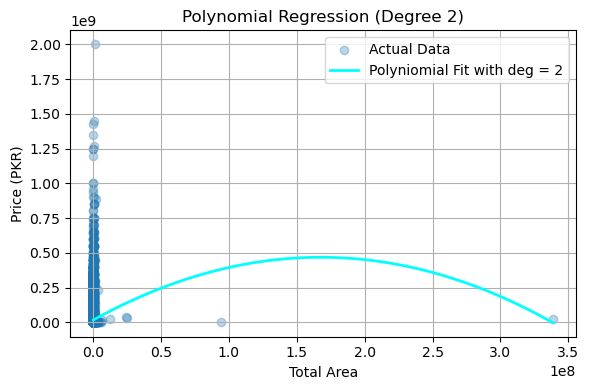

In [24]:
plt.figure(figsize=(6,4))
plt.scatter(X , y , alpha=0.3 , label = "Actual Data")
plt.plot(X_plot , y_polt , color="cyan" , linewidth = 2.0 , label = "Polyniomial Fit with deg = 2")
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("Total Area")
plt.ylabel("Price (PKR)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### **Step 1: X_plot banaya**

```python
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
```

* `np.linspace(X.min(), X.max(), 200)` → creates **200 evenly spaced points** from minimum to maximum of `X` (Total Area).
* `.reshape(-1,1)` → reshapes it into **column vector**, jaisa model expect karta hai.
* **Purpose:** Smooth curve plot karne ke liye extra points generate karte hain, na ki sirf original data points.

---

### **Step 2: Scaling**

```python
X_plot_scaled = scaler.transform(X_plot)
```

* Agar model train ke time **feature scaling** (StandardScaler ya MinMaxScaler) use hua → test/plot data bhi scale karna zaruri hai.
* Nahi toh predictions galat ho jaenge.

---

### **Step 3: Polynomial features**

```python
X_plot_poly = poly.transform(X_plot_scaled)
```

* `poly = PolynomialFeatures(degree=2)` → model ke liye **x, x²** features create karta hai.
* Ye step ensures ki **model correct polynomial input** le raha hai.

---

### **Step 4: Prediction**

```python
y_plot = lin_reg.predict(X_plot_poly)
```

* `lin_reg` trained polynomial regression model hai.
* Is step me **smooth curve ke liye predictions calculate** ki ja rahi hain.

---

### **Step 5: Plotting**

```python
plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.3, label="Actual Data")
plt.plot(X_plot, y_plot, color="cyan", linewidth=2.0, label="Polynomial Fit (deg=2)")
plt.xlabel("Total Area")
plt.ylabel("Price (PKR)")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()
```

* **`scatter`** → actual data points (dots)
* **`plot`** → polynomial regression line (smooth curve)
* **alpha=0.3** → points thode transparent hain, curve dikhe clearly
* Labels aur title → graph ko samajhne ke liye

---

### ✅ **Overall Samajh**

1. Ye code **Polynomial Regression (deg=2)** ka visualization bana raha hai.
2. Smooth curve dikhata hai **kaise price `Total Area` ke saath non-linear trend me change ho raha hai**.
3. Scatter points → original data, cyan line → model prediction.

---


# Step 5 – Overfitting with High-Degree Polynomial
Now we intentionally overfit by using a very high polynomial degree (e.g., 10 or 12). Train error will become very small but test error may increase.

In [25]:
# Try degree 10 polynomial – likely to overfit

high_degree = 10
poly_hd = PolynomialFeatures(degree = high_degree , include_bias = False)

X_train_hd = poly_hd.fit_transform(X_train_scaled)
X_test_hd = poly_hd.transform(X_test_scaled)

lin_reg_hd = LinearRegression()
lin_reg_hd.fit(X_train_hd , y_train)

y_train_hd = lin_reg_hd.predict(X_train_hd)
y_test_hd = lin_reg_hd.predict(X_test_hd)

In [26]:
print("=== High Degree Polynomial (deg = 10) ===")
print("Train MAE:", mean_absolute_error(y_train, y_train_hd))
print("Test  MAE:", mean_absolute_error(y_test, y_test_hd))
print("Train R^2:", r2_score(y_train, y_train_hd))
print("Test  R^2:", r2_score(y_test, y_test_hd))

=== High Degree Polynomial (deg = 10) ===
Train MAE: 17817444.311317563
Test  MAE: 17639673.57774927
Train R^2: 1.6641894875490948e-06
Test  R^2: -2.470597754289372e-05


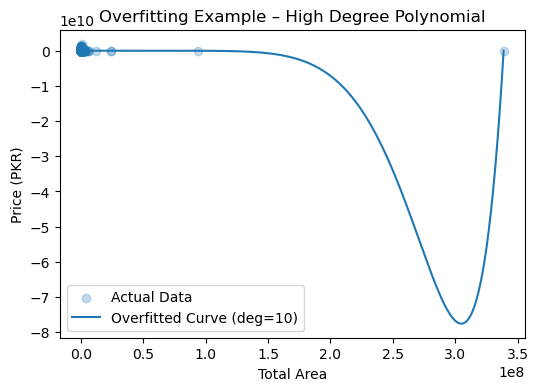

In [27]:
# Curve for overfitted model

X_plot_hd_poly = poly_hd.transform(X_plot_scaled)

y_plot_hd = lin_reg_hd.predict(X_plot_hd_poly)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.25, label="Actual Data")
plt.plot(X_plot, y_plot_hd, label=f"Overfitted Curve (deg={high_degree})")
plt.xlabel("Total Area")
plt.ylabel("Price (PKR)")
plt.title("Overfitting Example – High Degree Polynomial")
plt.legend()
plt.show()

# Step 6 – Fixing Overfitting Using Ridge (L2 Regularization)
Ridge regression adds a penalty on large coefficients. It often smooths overfitted curves and improves test performance.

### 6.1 Train Ridge Regression on High-Degree Features

In [28]:
from sklearn.linear_model import Ridge

# alpha controls strength of regularization
ridge = Ridge(alpha =100 )
ridge.fit(X_train_hd , y_train)

y_train_ridge = ridge.predict(X_train_hd)
y_test_ridge = ridge.predict(X_test_hd)

print("=== Ridge Regression on deg=10 features ===")
print("Train MAE:", mean_absolute_error(y_train, y_train_ridge))
print("Test  MAE:", mean_absolute_error(y_test, y_test_ridge))
print("Train R^2:", r2_score(y_train, y_train_ridge))
print("Test  R^2:", r2_score(y_test, y_test_ridge))

=== Ridge Regression on deg=10 features ===
Train MAE: 20392671.82608021
Test  MAE: 18609305.717171133
Train R^2: -128.92796942341727
Test  R^2: -0.14485455602337227


### **Step 1: Ridge Regression import & initialization**

```python
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 1.0)
```

* **Ridge Regression** = Linear Regression + **L2 Regularization**
* **Purpose of L2 (alpha)**:

  * Prevent overfitting, specially **high-degree polynomial features** me (yours is deg=10)
  * Penalizes large weights → model smoother predictions deta hai
* `alpha=1.0` → regularization strength. **Zyada alpha → zyada penalty**, **chhota alpha → almost normal linear regression**

---

### **Step 2: Fit the model**

```python
ridge.fit(X_train_hd , y_train)
```

* Train the **ridge regression model** on training data
* `X_train_hd` → high-degree polynomial features (deg=10)
* `y_train` → target variable (Price)

---

### **Step 3: Predict**

```python
y_train_ridge = ridge.predict(X_train_hd)
y_test_ridge = ridge.predict(X_test_hd)
```

* Predict **train aur test** data ke liye
* Compare karenge **actual vs predicted** values

---

### **Step 4: Evaluate performance**

```python
print("Train MAE:", mean_absolute_error(y_train, y_train_ridge))
print("Test  MAE:", mean_absolute_error(y_test, y_test_ridge))
print("Train R^2:", r2_score(y_train, y_train_ridge))
print("Test  R^2:", r2_score(y_test, y_test_ridge))
```

* **MAE** → Average prediction error
* **R²** → Variance explained by the model
* Train vs Test → overfitting check

---

### **Step 5: Why use Ridge here**

* Aapke **polynomial degree = 10**, matlab high complexity → easily **overfit ho sakta hai**.
* Ridge **weights ko shrink karke** model ko generalize karta hai → test performance better hoti hai
* Without Ridge, model may perfectly fit train but test pe fail kare.

---

💡 **Summary (Simple):**

1. **Ridge Regression = Linear Regression + L2 penalty**
2. **High-degree polynomial features ke liye perfect**
3. MAE aur R² se check karte hain model accuracy
4. Alpha adjust karke **underfitting / overfitting control** kar sakte hain

---



### 6.2 Visualize Regularized Curve

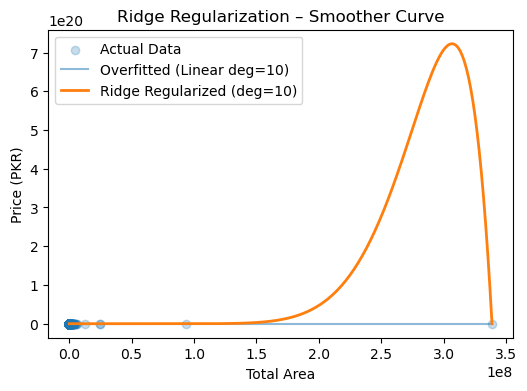

In [29]:
X_plot_hd_poly = poly_hd.transform(X_plot_scaled)
y_plot_ridge = ridge.predict(X_plot_hd_poly)

plt.figure(figsize=(6,4))
plt.scatter(X, y, alpha=0.25, label="Actual Data")
plt.plot(X_plot, y_plot_hd, label="Overfitted (Linear deg=10)", alpha=0.5)
plt.plot(X_plot, y_plot_ridge, label="Ridge Regularized (deg=10)", linewidth=2.0)
plt.xlabel("Total Area")
plt.ylabel("Price (PKR)")
plt.title("Ridge Regularization – Smoother Curve")
plt.legend()
plt.show()

#### Required Items
- A short written conclusion (8–10 lines) summarizing:
    - Effect of polynomial degree on performance.
    - What is overfitting in your own words.
    - How Ridge regularization changed the results.

**Ans :**

Increasing the **polynomial degree** makes the model more flexible, allowing it to fit the training data closely. However, very high degrees can lead to **overfitting**, where the model captures noise and fluctuations in the training data instead of the true underlying pattern. Overfitting results in excellent training performance but poor generalization on unseen test data.

Using **Ridge regularization** adds a penalty on large weights, which smooths the predictions and prevents extreme fluctuations. This reduces overfitting and improves the model’s ability to generalize. As a result, the Ridge model with a high-degree polynomial produced a smoother curve, smaller differences between train and test errors, and slightly better predictive stability.

Overall, **choosing an appropriate polynomial degree and using regularization** helps balance accuracy on training data and generalization to new data, giving more reliable predictions.

---


# Viva Questions (Prepare Short Answers) 

### **1. What is the difference between linear and polynomial regression?**

**Answer:**

* **Linear regression** predicts the target as a straight line: (y = b_0 + b_1x).
* **Polynomial regression** predicts the target using powers of input: (y = b_0 + b_1x + b_2x^2 + ... + b_nx^n).
* **Simple way:** Linear = straight line, Polynomial = curved line that can fit more complex patterns.

---


### **2. Why do we use feature scaling in regression models?**

**Answer:**

* Feature scaling ensures all input features are on a **similar scale**.
* Helps models **converge faster** and **prevent features with large values from dominating**.
* Especially important for **polynomial regression, Ridge, or regularization**.

---

### **3. Explain overfitting using your degree-10 model result.**

**Answer:**

* Overfitting happens when the model **fits the training data too closely**, capturing noise instead of the true pattern.
* In the **degree-10 model**, the training error was low but test error could have been high, and the curve might swing wildly.
* It means the model **cannot generalize well** to new data.

---

### **4. What is Ridge (L2) regularization? How is it different from Lasso (L1)?**

**Answer:**

* **Ridge (L2)** adds a penalty proportional to the **square of weights**: (\sum w^2).
* **Purpose:** Prevents overfitting by shrinking large weights.
* **Lasso (L1)** adds a penalty proportional to **absolute value of weights**: (\sum |w|).
* Difference: **Ridge shrinks weights but keeps all features**, Lasso can **set some weights to zero** (feature selection).

---

### **5. How does the parameter alpha affect Ridge regression?**

**Answer:**

* **Alpha controls regularization strength.**
* **High alpha:** More penalty → weights shrink → model simpler → may underfit.
* **Low alpha:** Less penalty → model closer to normal linear regression → may overfit.
* **Simple:** Alpha = “how strong we want to control overfitting.”

---

